<a href="https://colab.research.google.com/github/Saurav-Raghaw/hello-world/blob/main/Research_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

##Gradient Descent


#Dataset Description
Bike Sharing Dataset: Bike-sharing rental process is highly correlated to the environmental and seasonal settings. For instance, weather conditions,
precipitation, day of week, season, hour of the day, etc. can affect the rental behaviors.

#Linear Regression
Associated tasks: Regression- Predication of bike rental count hourly or daily based on the environmental and seasonal settings.

#Importing Libraries

In [168]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error

#Loading The Dataset

In [169]:
df = pd.read_csv('/content/hour.csv')
df.head()

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,40
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,5,27,32
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,3,10,13
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,0,1,1


#Preprocessing: Removing Outliers and Scaling

In [170]:
df[['temp', 'cnt']].describe()[1:]

,temp,cnt
mean,0.496987,189.463088
std,0.192556,181.387599
min,0.020000,1.000000
25%,0.340000,40.000000
50%,0.500000,142.000000
75%,0.660000,281.000000
max,1.000000,977.000000


It seems that cnt has some outliers, because 75% of the data has cnt less than 281, but maximum price go as high as 977. We're going to remove extremely large cnt as they will add unnecessary noize to the data.

In [171]:
df_new = df[df.cnt < 500]
df_new.head()

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,40
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,5,27,32
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,3,10,13
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,0,1,1


In [172]:
df_new[['temp', 'cnt']].describe()[1:]

,temp,cnt
mean,0.486306,153.803132
std,0.191804,131.937553
min,0.020000,1.000000
25%,0.320000,34.000000
50%,0.480000,125.000000
75%,0.640000,240.000000
max,1.000000,499.000000


Now Outlires have been removed.

#Scale the cnt column within range [0-1]

In [173]:
def scale(x):
    min = x.min()
    max = x.max()
    return pd.Series([(i - min)/(max - min) for i in x])

#Input and Output
Here i have taken y = cnt and x = temp. Based on the temp i will predict the cnt.

In [174]:
x = df_new['temp']
x.head()


0    0.24
1    0.22
2    0.22
3    0.24
4    0.24
Name: temp, dtype: float64

In [175]:
y = scale(df_new.cnt)
y.head()

0    0.030120
1    0.078313
2    0.062249
3    0.024096
4    0.000000
dtype: float64

In [176]:
x.max(), y.max() #good.

(1.0, 1.0)

#Relationship Between temp and cnt
Visually we can determine what kind of accuracy we can expect from the models

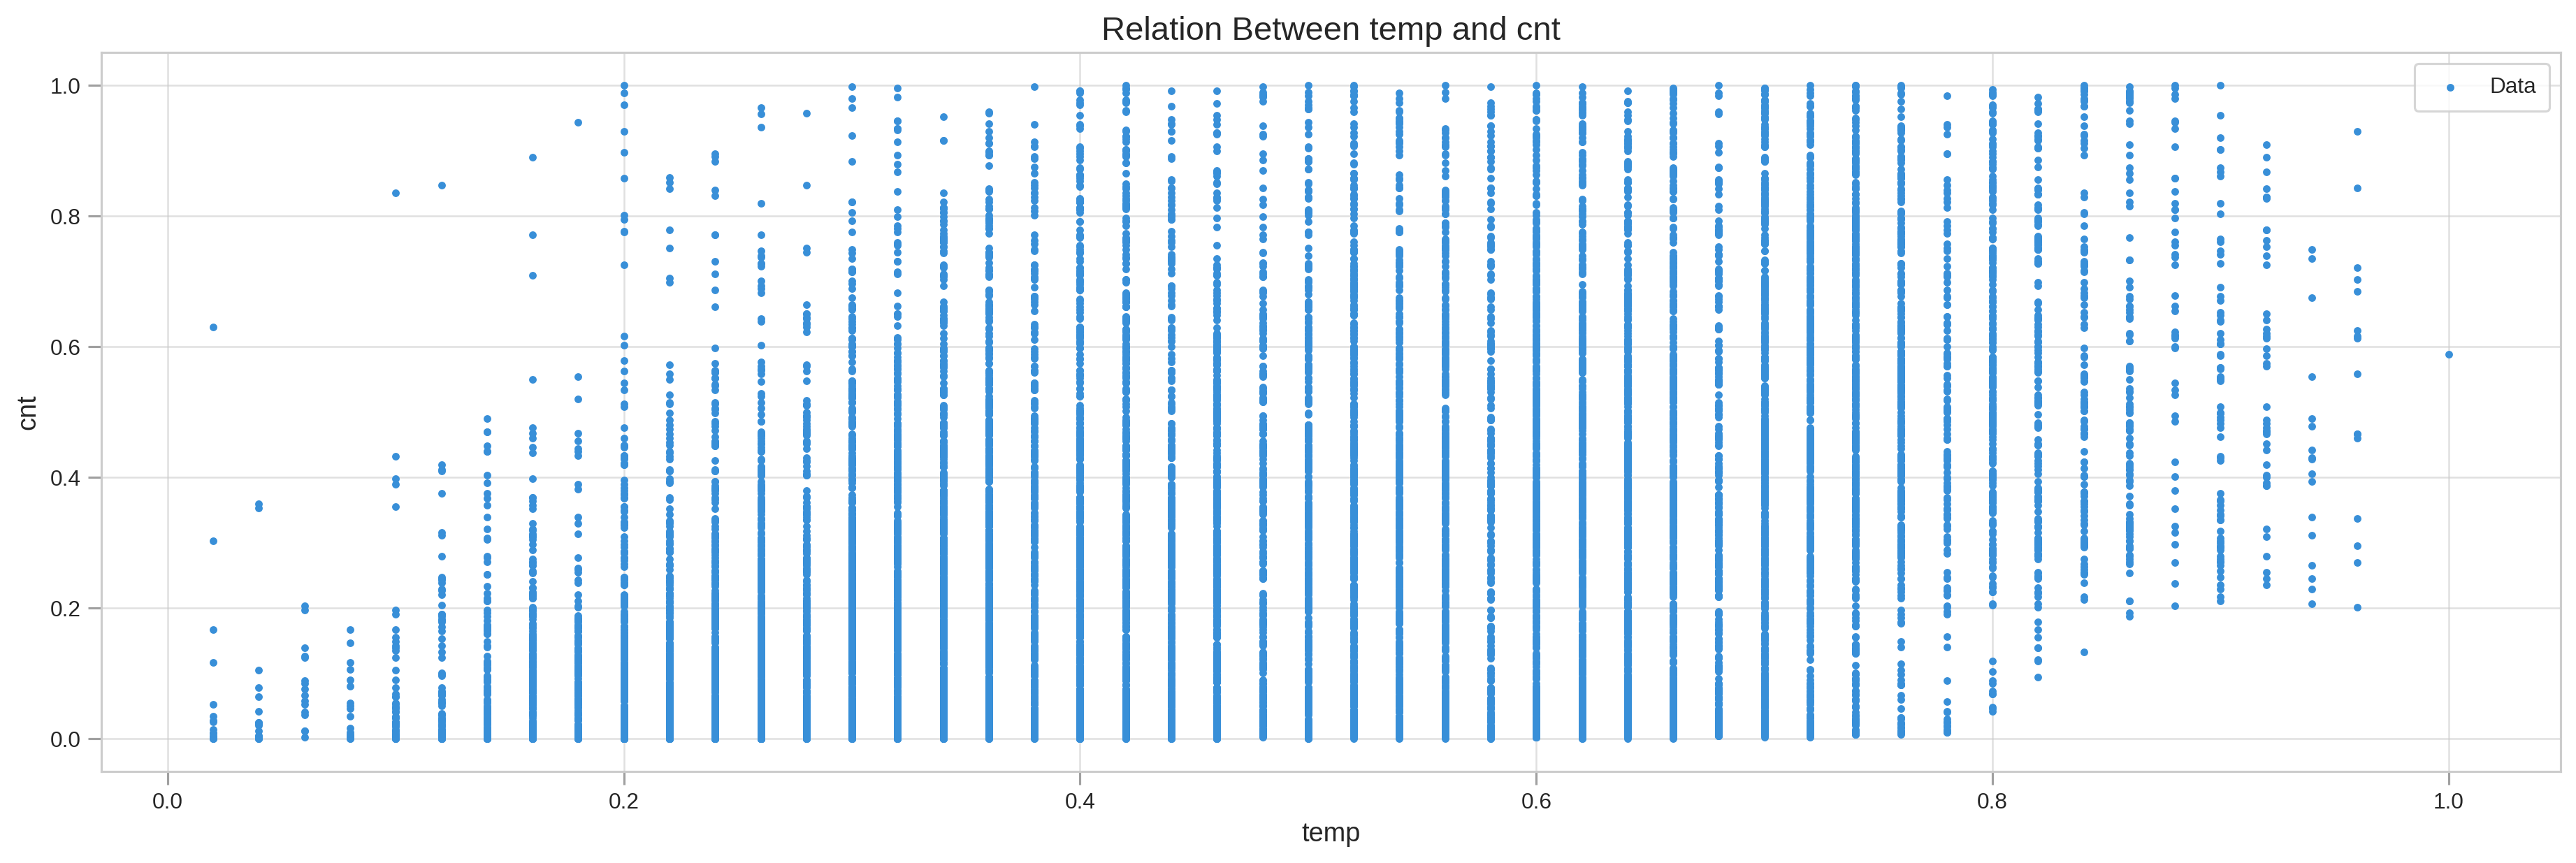

In [177]:
plt.figure(figsize=(20,6))
plt.rcParams['figure.dpi'] = 227
plt.style.use('seaborn-whitegrid')
plt.scatter(x, y, label='Data', c='#388fd8', s=6)
plt.title('Relation Between temp and cnt', fontSize=15)
plt.xlabel('temp', fontSize=12)
plt.ylabel('cnt', fontSize=12)
plt.legend(frameon=True, loc=1, fontsize=10, borderpad=.6)
plt.tick_params(direction='out', length=6, color='#a0a0a0', width=1, grid_alpha=.6)
plt.show()

#Univariate Linear Regression (Without Gradient Descent)
$$\hat{y} = mx + b$$


$$m = \frac{\overline{x}\overline{y}-\overline{xy}}{(\overline{x})^2 - \overline{x^2}} \quad \textrm{and} \quad b = \overline{y}-m\overline{x}$$

If we want to add some other features, like humidity, our formula would look like this: $\hat{y} = m_1x_1 + m_2x_2 + b$, where $m_1$ and $m_2$ are slopes for each feature $x_1$ and $x_2$. In this case we would call it multiple linear regression, but we could no longer use formulas above.


In [178]:
class UnivariateLinearRegression:
        
    def fit(self, X, y):
        self.X = X
        self.y = y
        self.m = ((np.mean(X) * np.mean(y) - np.mean(X*y)) / ((np.mean(X)**2) - np.mean(X**2)))
        self.b = np.mean(y) - self.m * np.mean(X)
    
    def coeffs(self):
        return self.m, self.b
    
    def predict(self):
        self.y_pred = self.m * self.X + self.b
        return self.y_pred
    
    def r_squared(self):
        self.y_mean = np.full((len(self.y)), mean(self.y))
        err_reg = sum((self.y - self.y_pred)**2)
        err_y_mean = sum((self.y - self.y_mean)**2)
        return (1 - (err_reg/err_y_mean))

In [179]:
def plot_regression(X, y, y_pred, log=None, title="Linear Regression"):
    
    plt.figure(figsize=(20,6))
    plt.rcParams['figure.dpi'] = 227
    plt.scatter(X, y, label='Data', c='#388fd8', s=6)
    if log != None:
        for i in range(len(log)):
            plt.plot(X, log[i][0]*X + log[i][1], lw=1, c='#caa727', alpha=0.35)
    plt.plot(X, y_pred, c='#ff7702', lw=3, label='Regression')
    plt.title(title, fontSize=14)
    plt.xlabel('temp', fontSize=11)
    plt.ylabel('cnt', fontSize=11)
    plt.legend(frameon=True, loc=1, fontsize=10, borderpad=.6)
    plt.tick_params(direction='out', length=6, color='#a0a0a0', width=1, grid_alpha=.6)
    plt.show()

In [180]:
lr = UnivariateLinearRegression()

In [181]:
lr.fit(x, y)

In [182]:
y_pred = lr.predict()

MSE: 0.06036862963818121


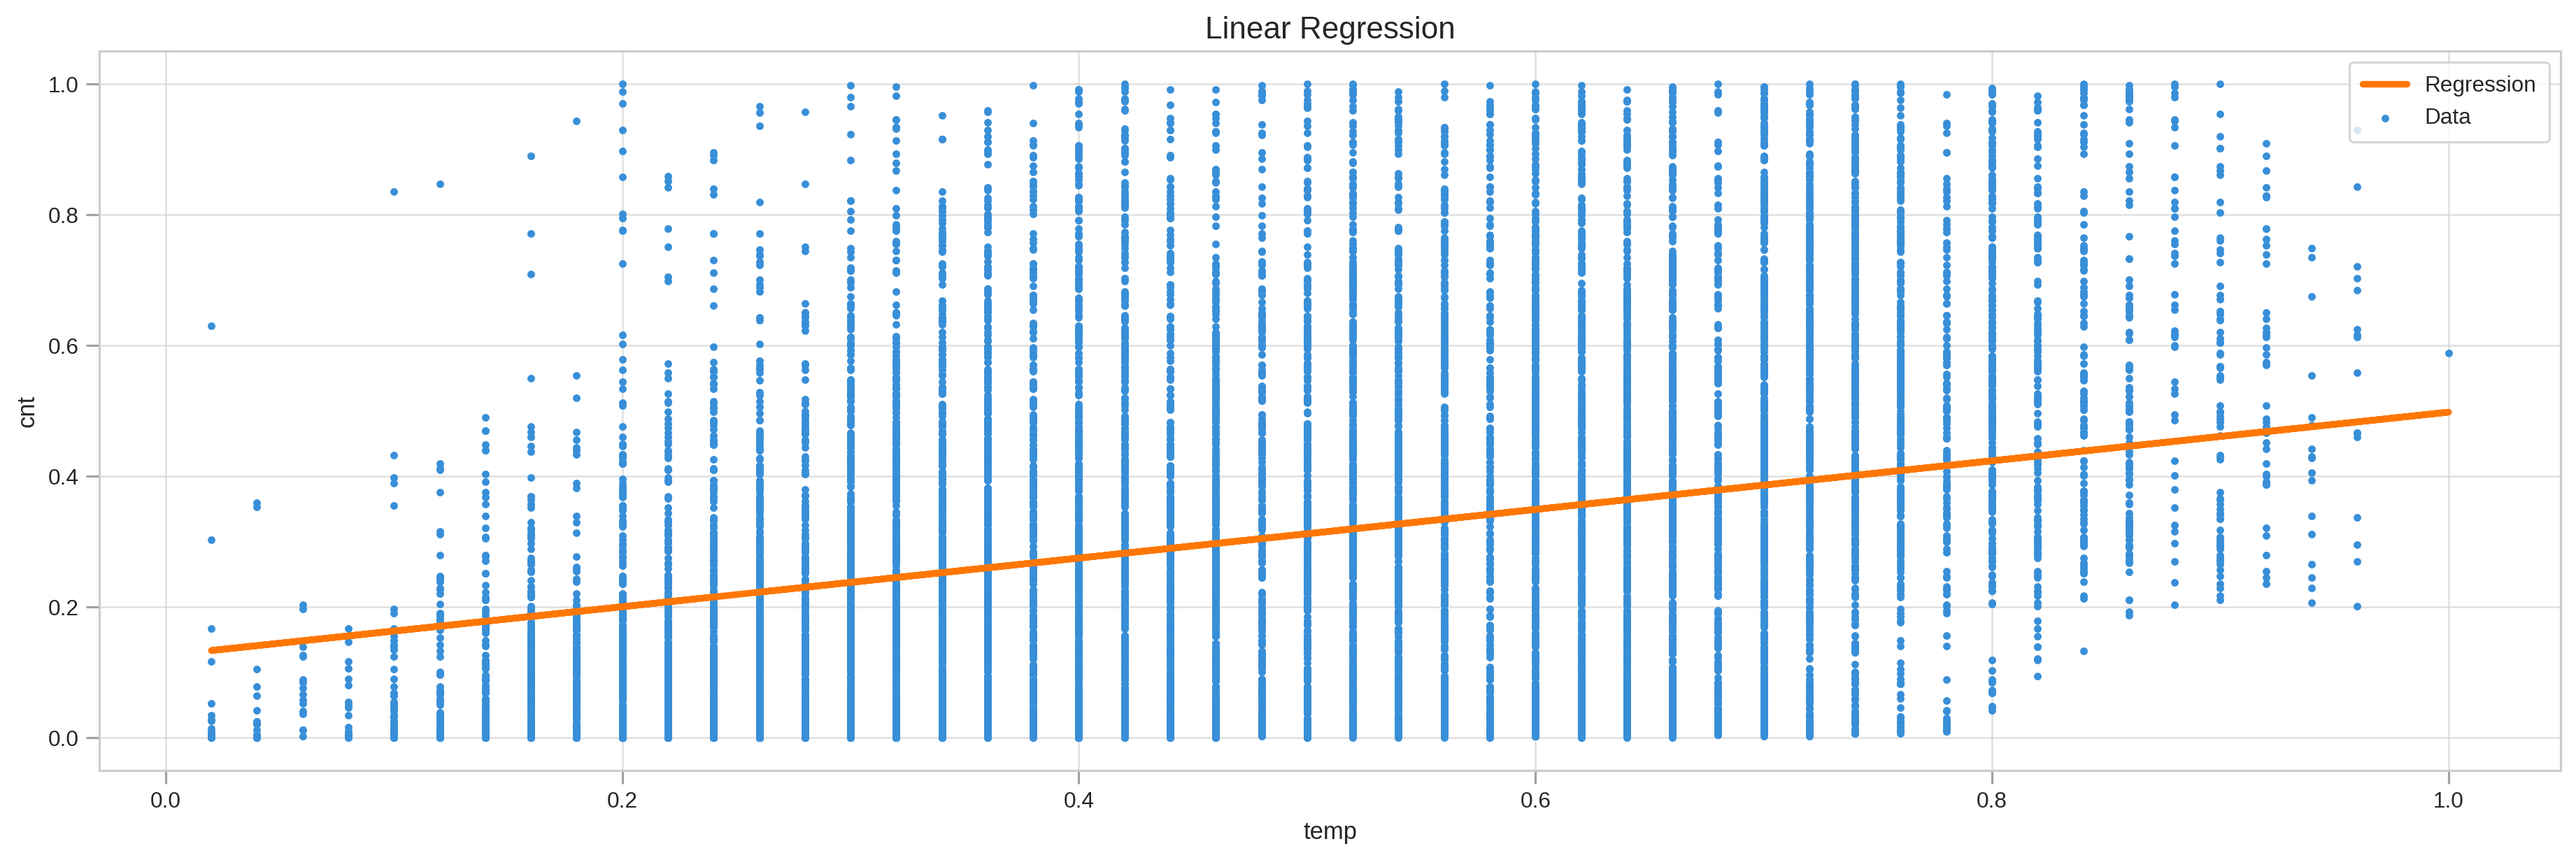

In [183]:
print("MSE:",mean_squared_error(y, y_pred))
plot_regression(x, y, y_pred, title="Linear Regression")

#Gradient Descent
$$ MSE = \frac{1}{n}\sum_{i=1}^{n} (y_i - \hat{y_i})^2 \quad \textrm{where} \quad \hat{y_i} = mx_i + b $$
$$𝑓(𝑚,𝑏)= \frac{1}{n}\sum_{i=1}^{n}(y_i - (mx_i+b))^2$$
$$\frac{\partial f}{\partial m} = \frac{1}{n}\sum_{i=1}^{n}-2x_i(y_i - (mx_i+b))$$
$$\frac{\partial f}{\partial b} = \frac{1}{n}\sum_{i=1}^{n}-2(y_i - (mx_i+b))$$


    
    
    

*   Gradient descent is an iterative process and with each iteration (epoch) we slightly minimizing MSE, so each time we use our derived functions to update parameters m and b
*   Because its iterative, we should choose how many iterations we take, or make algorithm stop when we approach minima of MSE. In other words when algorithm is no longer improving MSE, we know it reached minimum.
* Gradient descent has an additional parameter learning rate (lr), which helps control how fast or slow algorithm going towards minima of MSE


Thats about it. So you can already understand that Gradient Descent for the most part is just process of taking derivatives and using them over and over to minimize function.

In [184]:
def gradient_descent(X, y, lr=0.05, epoch=10):
    
    '''
    Gradient Descent for a single feature
    '''
    
    m, b = 0.2, 0.2 # parameters
    log, mse = [], [] # lists to store learning process
    N = len(X) # number of samples
    
    for _ in range(epoch):
                
        f = y - (m*X + b)
    
        # Updating m and b
        m -= lr * (-2 * (X*f).sum() / N)
        b -= lr * (-2 * f.sum() / N)
        
        log.append((m, b))
        mse.append(mean_squared_error(y, (m*X + b)))        
    
    return m, b, log, mse

In [185]:
m, b, log, mse = gradient_descent(x, y, lr=0.01, epoch=1000)

In [186]:
y_pred = m*x + b

MSE: 0.06225400834068325


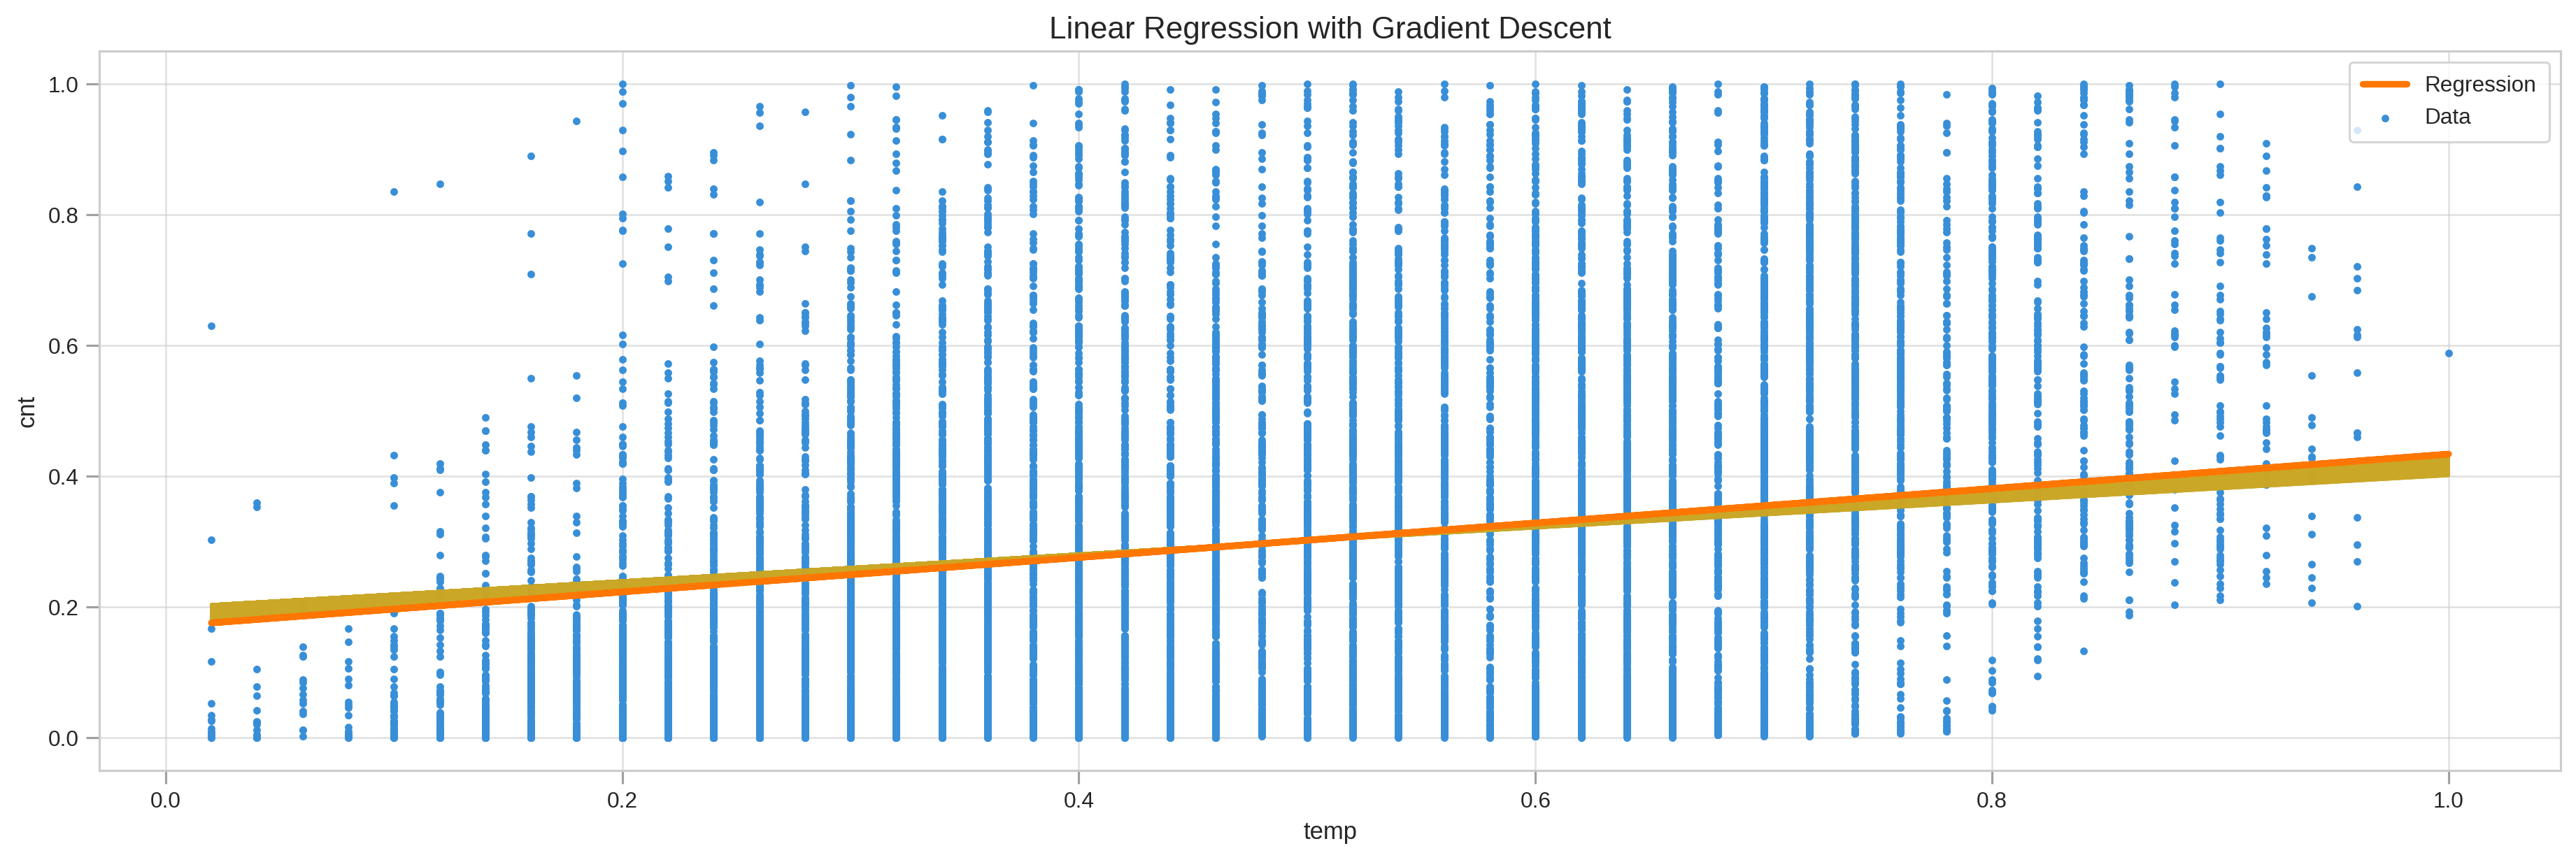

In [187]:
print("MSE:",mean_squared_error(y, y_pred))
plot_regression(x, y, y_pred, log=log, title="Linear Regression with Gradient Descent")


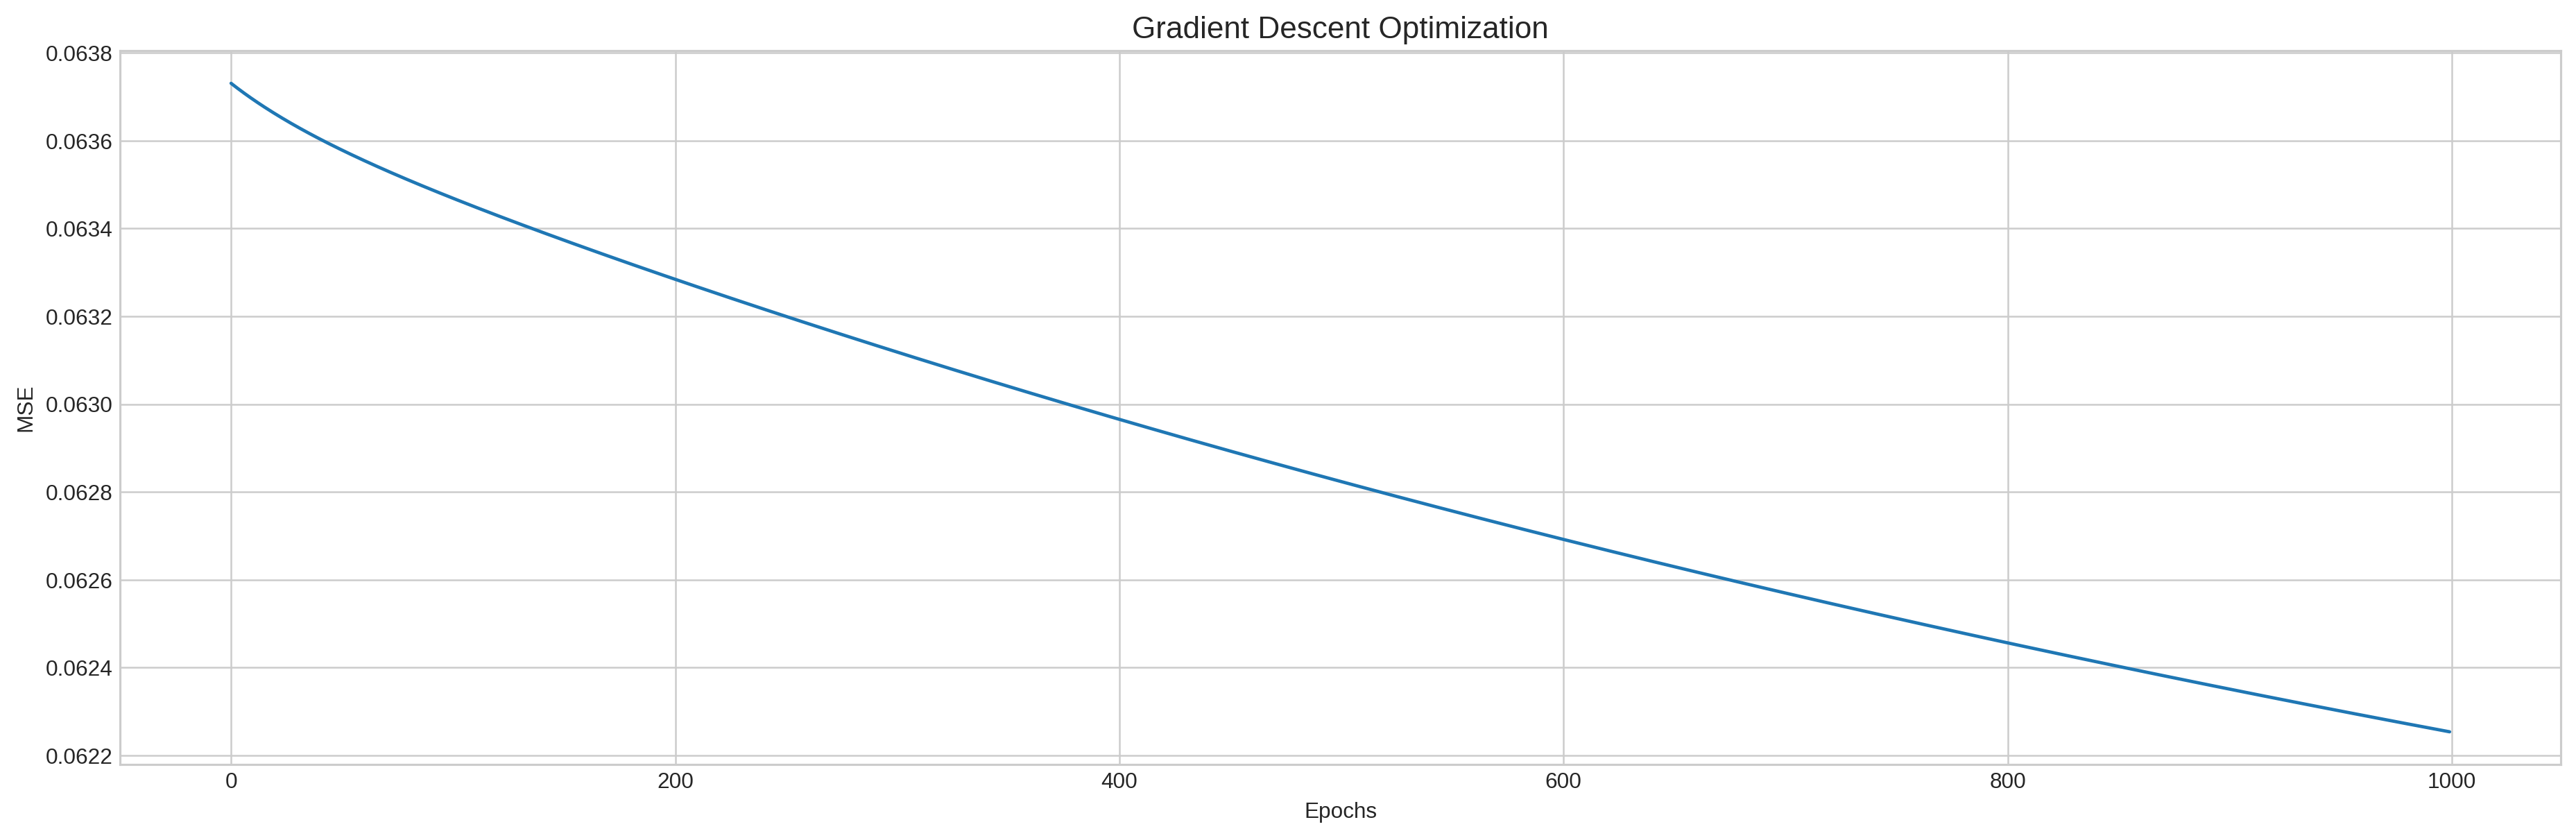

In [188]:
plt.figure(figsize=(20,6))
plt.rcParams['figure.dpi'] = 227
plt.plot(range(len(mse)), mse)
plt.title('Gradient Descent Optimization', fontSize=14)
plt.xlabel('Epochs')
plt.ylabel('MSE')
plt.show()

#Speed Test for Univariate Linear Regression without Gradient Descent and With Gradient descent

In [189]:
X1=x
X1 = np.concatenate((X1,X1,X1,X1,X1,X1,X1,X1,X1,X1,X1,X1,X1,X1,X1,X1,X1))
y = np.concatenate((y,y,y,y,y,y,y,y,y,y,y,y,y,y,y,y,y))

In [190]:
X.shape, y.shape

((273564,), (273564,))

In [191]:
%timeit UnivariateLinearRegression()

The slowest run took 24.21 times longer than the fastest. This could mean that an intermediate result is being cached.
10000000 loops, best of 3: 83.2 ns per loop


In [192]:
%timeit gradient_descent(X, y, lr=0.01, epoch=1000)

1 loop, best of 3: 4.05 s per loop


#Notes:
In machine learning, accuracy is defined for discrete values (classes). Its defined as the fraction of correct predictions from total predictions made.

So, a prediction of value 319 where true value is 320 is still an incorrect prediction.

So its not advised to calculate accuracy for continuous values. For such values you would want to calculate a measure of how close the predicted values are to the true values. This task of prediction of continuous values is known as regression. And generally R-squared value is used to measure the performance of the model.

You can use r2_score(y_true, y_pred) for your scenario.

There are various metrics for regression tasks (continuous variables prediction) like:-

Mean squared error,
Mean absolute error,
Variance score, etc